In [8]:
import json
import pandas as pd
import numpy as np

In [ ]:
with open("processed_decomposed_dataset.jsonl", "r") as f:
    data_txt = [json.loads(x) for x in f.readlines()]

In [10]:
data_txt[4]

{'query': 'I have a project where we deploy the "Vertex AI Vision SDK" into a container in Docker Desktop on the client computer on the edge and the sdk pushes the camera feed from the rtsp to Google Cloud\'s Vertex AI Vision and it goes through pre-trained human/vehicle model to find out count and that information is written into BigQuery in json format. This information will be queried and provided back to the customer in json response. \n\nI would like to identify the roundtrip time from the start of the stream to the json response. However the timestamp on the camera is off. It\'s hard to evaluate the roundtrip time. \n\nProvide me methodologies/ideas on how to accurately calculate the roundtrip time.',
 'output_a': 'To accurately calculate the roundtrip time for your Vertex AI Vision SDK container deployment, you can use the following methodologies:\n\n1. Add a timestamp to the camera feed: You can add a timestamp to the camera feed that is sent to Vertex AI Vision. This will allo

In [11]:
data_df = pd.DataFrame(data_txt)

In [12]:
data_df

,query,output_a,M_a_text,T_a_text,A_a_text,M_a_span,T_a_span,A_a_span,S_a,output_b,M_b_text,T_b_text,A_b_text,M_b_span,T_b_span,A_b_span,S_b,label
0,Define Signal Discuss its various properties w...,A signal is a form of energy that is used to t...,"Begins by interpreting the user's request, pro...",Transitions into a structured breakdown of sig...,A signal is a form of energy that is used to t...,"[0, 27]","[28, 102]","[0, 121]",Define and List Core Properties,A signal is a message that is conveyed from a ...,"Opens by interpreting the user's intent, defin...",Implements a systematic approach by listing an...,A signal is a message that is conveyed from a ...,"[0, 38]","[39, 180]","[0, 205]",Comprehensive List with Examples and Diagram R...,1
1,Please make a list of independent Fertility co...,"Sure, here are some independent Fertility coac...",Signals intent to fulfill the user's request a...,Implements the plan by presenting a numbered l...,1. Fertility Authority\n2. Fertility Solutions...,"[0, 18]","[19, 70]","[19, 70]",List Format with Placeholder Filling,"Sure, here is a list of independent Fertility ...",Acknowledges the request and frames the respon...,Executes by providing a numbered list of plaus...,1. Fertility Focus LLC\n2. Fertility Journey I...,"[0, 20]","[21, 99]","[21, 99]",List with Caveat and User Guidance,3
2,Explain various data mining functionalities wi...,Data mining is a process of discovering patter...,"Begins by interpreting the user's request, def...","Transitions into a structured list, systematic...",These are just a few examples of the many diff...,"[0, 27]","[28, 169]","[170, 239]","Define, List, and Exemplify",Data mining is the process of discovering patt...,Opens with a concise definition of data mining...,"Implements a detailed, itemized approach: for ...",These are just a few examples of the many data...,"[0, 20]","[21, 210]","[211, 282]","Define, Enumerate, and Contextualize",1
3,How do I change the short cut on mac osx to to...,To change the shortcut on Mac OS X to toggle t...,"Sets up a clear instructional intent, restatin...","Implements a detailed, sequential procedure wi...",That's it! Now you can use the key combination...,"[0, 18]","[19, 143]","[144, 159]",Stepwise Procedural Guide,To change the shortcut for toggling VoiceOver ...,Restates the user's goal and frames the respon...,"Presents a concise, ordered list of steps, inc...",Note: The default shortcut to toggle VoiceOver...,"[0, 16]","[17, 120]","[121, 135]",Concise Step List with Default Reference,0
4,"I have a project where we deploy the ""Vertex A...",To accurately calculate the roundtrip time for...,Restates the user's goal and frames the respon...,Organizes the answer as a numbered list of dis...,"By using one or more of these methodologies, y...","[0, 19]","[20, 120]","[121, 143]",List of Methods with Summary Conclusion,Here are some methodologies and ideas to accur...,Introduces the response as a direct answer to ...,"Presents a detailed, numbered list of methodol...","By implementing these methodologies, you can a...","[0, 18]","[19, 188]","[189, 211]",Comprehensive Tool-Based Method List,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,I want to open the developler tools in chrome ...,I'm here to help! It's possible that the websi...,Expresses intent to help and frames the proble...,Suggests a step-by-step approach to confirm th...,If you need to use the developer tools on this...,"[0, 33]","[34, 107]","[108, 146]",Diagnose and Advise with Alternatives,The shortcut for opening the developer tools i...,Begins by clarifying the standard shortcuts an...,"Lists multiple possible reasons for the issue,...","If none of these solutions work, you can try u...","[0, 32]","[33, 181]","[182, 232]",Enumerate Causes and Troubleshoot,1
9115,Market trends in the 13th century in france\n<...,The economic and agricultural growth in 13th c...,Begins by framing the historical context and c...,"Considers po

In [13]:
data_df['label'].value_counts()

label
 0    2007
 1    1686
-1    1345
 2    1328
-2    1233
 3     769
-3     751
Name: count, dtype: int64

In [14]:
def MTA_span_analysis(row):
    out_a = row['output_a']
    len_a = len(out_a.split(" "))
    out_b = row['output_b']
    len_b = len(out_b.split(" "))

    M_a_start, M_a_end = row['M_a_span'] if len(row['M_a_span']) == 2 else (0, 0)
    T_a_start, T_a_end = row['T_a_span'] if len(row['T_a_span']) == 2 else (0, 0)
    A_a_start, A_a_end = row['A_a_span'] if len(row['A_a_span']) == 2 else (0, 0)

    M_b_start, M_b_end = row['M_b_span'] if len(row['M_b_span']) == 2 else (0, 0)
    T_b_start, T_b_end = row['T_b_span'] if len(row['T_b_span']) == 2 else (0, 0)
    A_b_start, A_b_end = row['A_b_span'] if len(row['A_b_span']) == 2 else (0, 0)

    row['len_a'] = len_a
    row['len_b'] = len_b

    row['start_M_a'] = M_a_start / len_a
    row['end_M_a'] = M_a_end / len_a

    row['start_T_a'] = T_a_start / len_a
    row['end_T_a'] = T_a_end / len_a

    row['start_A_a'] = A_a_start / len_a
    row['end_A_a'] = A_a_end / len_a

    row['start_M_b'] = M_b_start / len_b
    row['end_M_b'] = M_b_end / len_b

    row['start_T_b'] = T_b_start / len_b
    row['end_T_b'] = T_b_end / len_b

    row['start_A_b'] = A_b_start / len_b
    row['end_A_b'] = A_b_end / len_b
    return row


In [15]:
new_df = data_df.apply(MTA_span_analysis, axis=1)

In [16]:
new_df["len_a"].mean(), new_df["len_b"].mean()

(228.88112731659174, 249.31922359907884)

In [17]:
new_df['start_A_a'].mean(), new_df['end_A_a'].mean(), new_df['start_A_b'].mean(), new_df['end_A_b'].mean()

(0.4307368504152278,
 1.3082202833196537,
 0.45925024884786353,
 1.1208677887501024)

In [18]:
new_df['start_M_a'].mean(), new_df['end_M_a'].mean(), new_df['start_M_b'].mean(), new_df['end_M_b'].mean()

(0.0008669570099153305,
 0.1302537237003171,
 0.0009955354937316802,
 0.1422490106064255)

In [19]:
new_df['start_T_a'].mean(), new_df['end_T_a'].mean(), new_df['start_T_b'].mean(), new_df['end_T_b'].mean()

(0.12077780836506036,
 0.6252283212456938,
 0.12851892285585936,
 0.6397229096659025)

In [20]:
S = pd.Series(list(new_df['S_a']) + list(new_df['S_b']))
M = pd.Series(list(new_df['M_a_text']) + list(new_df['M_b_text']))
T = pd.Series(list(new_df['T_a_text']) + list(new_df['T_b_text']))

In [21]:
S.value_counts()

Enumerate and Explain                       76
Enumerate and Summarize                     68
Stepwise Instructional Guide                61
Enumerate and Advise                        57
Request Clarification                       54
                                            ..
Stepwise Calculation with Labels             1
Direct JSON Listing                          1
Table with Data Validation                   1
Tabular Comparative Analysis                 1
Detailed Breakdown and Purpose Statement     1
Name: count, Length: 15597, dtype: int64

In [22]:
M.value_counts()

Not explicitly present                                                                                                                                                               455
Expresses uncertainty about the user's intent and requests clarification before proceeding.                                                                                            4
Restates the context and signals a summary of the result, showing the model is referencing prior calculation and preparing to deliver the answer.                                      2
Begins by directly defining the term, showing intent to provide a clear, concise explanation tailored to the user's question.                                                          2
Begins by explicitly restating the user's request, signaling understanding and intent to fulfill it.                                                                                   2
                                                                           

In [23]:
T.value_counts()

Not explicitly present                                                                                                                                                                                                                        281
Offers assistance by explicitly asking if the user needs help, inviting further interaction.                                                                                                                                                    3
Asks a clarifying question to gather more information before proceeding.                                                                                                                                                                        2
Transitions from the framing to the execution by presenting the list of patient IDs that fit the specified age range, using a direct enumeration format.                                                                                        2
Implements the plan by formattin

In [24]:
M = M[M!="Not explicitly present"]
T = T[T!="Not explicitly present"]

In [25]:
M.isna().sum(), T.isna().sum()

(0, 0)

In [26]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')  # strong general-purpose model

embeddings_M = model.encode(list(M), normalize_embeddings=True)
embeddings_T = model.encode(list(T), normalize_embeddings=True)
embeddings_S = model.encode(list(S), normalize_embeddings=True)

c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [27]:
import hdbscan
clustererM = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
clustererT = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
clustererS = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
labels_m = clustererM.fit_predict(embeddings_M)
labels_t = clustererT.fit_predict(embeddings_T)
labels_s = clustererS.fit_predict(embeddings_S)


c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

In [28]:
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, label in enumerate(labels_m):
    cluster_dict[label].append(list(M)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster -1 ---
Begins by interpreting the user's request, providing a general definition of 'signal' and establishing the context for further explanation.
Signals intent to fulfill the user's request and frames the response as a list, indicating understanding of the instruction.
Begins by interpreting the user's request, defining data mining, and setting a context for the explanation.
Restates the user's goal and frames the response as a set of methodologies to address the problem, indicating an intent to provide actionable solutions.
Acknowledges the request and frames the response as a list of five writing prompts, directly referencing the novel and story.

--- Cluster 189 ---
Sets up a clear instructional intent, restating the user's goal and signaling a step-by-step approach.
Sets up a step-by-step instructional approach, indicating the response will guide the user through the process.
Sets up a clear instructional intent by directly addressing the user's goal and framing the 

In [29]:
cluster_dict = defaultdict(list)
for i, label in enumerate(labels_t):
    cluster_dict[label].append(list(T)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster 2 ---
Transitions into a structured breakdown of signal properties, listing and defining amplitude, frequency, and phase, and then explains how a diagram (waveform) can represent these properties.
Implements the plan by presenting a numbered list format, but after a few unique entries, repeats a generic placeholder name to fill out the list.
Transitions into a structured list, systematically naming and describing each functionality, and providing an example for each.
Implements a detailed, sequential procedure with numbered steps, guiding the user through the system menus and actions required to change the shortcut.
Organizes the answer as a numbered list of distinct methodologies, each briefly described, to systematically address the roundtrip time measurement challenge.

--- Cluster -1 ---
Provides a brief factual justification by mentioning the origin and widespread adoption of PDF.
Breaks down the abstract into sequential, simplified explanations: describes the specifi

In [30]:
cluster_dict = defaultdict(list)
for i, label in enumerate(labels_s):
    cluster_dict[label].append(list(S)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster -1 ---
Define and List Core Properties
List Format with Placeholder Filling
List of Methods with Summary Conclusion
Direct List with Embedded Analysis Prompts
Contextualize and Sequentially Explain

--- Cluster 519 ---
Define, List, and Exemplify
Define, List, Exemplify, Evaluate
Clarify, Structure, and Exemplify
Define, List, and Exemplify
Clarify, Exemplify, and Guide

--- Cluster 656 ---
Stepwise Procedural Guide
Stepwise Procedural Guide
Stepwise Procedural Guide
Stepwise Procedural Guide
Stepwise Procedural Guide

--- Cluster 443 ---
Define and Enumerate Features
Enumerated Feature Listing
Enumerated Feature Listing
Enumerated Feature-Rich Listing
Enumerated Feature List

--- Cluster 241 ---
Prompt Generation and Reframing
Direct Structured Prompt Generation
Structured Prompt Construction
Direct List of Example Prompts
Patterned Prompt Generation and Explanation

--- Cluster 657 ---
Stepwise Instructional Guide
Stepwise Instructional Guide
Stepwise Instructional Guide

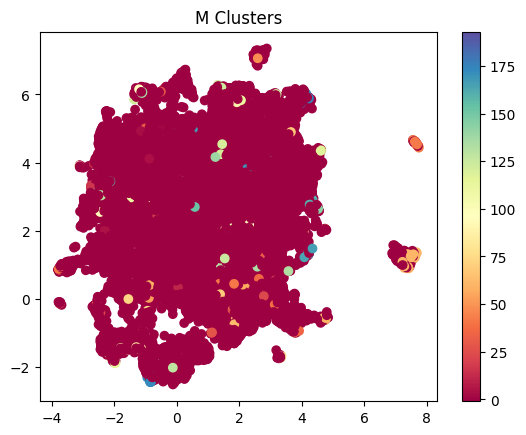

In [35]:
import umap
import matplotlib.pyplot as plt

umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_M)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_m, cmap='Spectral')
plt.title("M Clusters")
plt.colorbar()
plt.show()


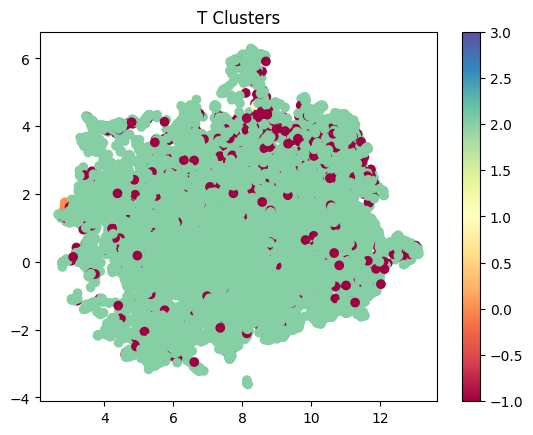

In [34]:
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_T)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_t, cmap='Spectral')
plt.title("T Clusters")
plt.colorbar()
plt.show()

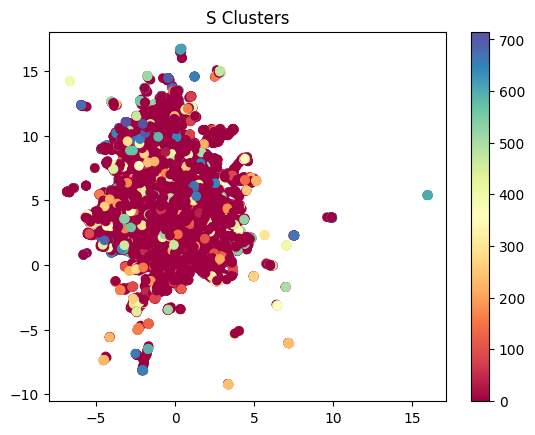

In [33]:
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_S)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_s, cmap='Spectral')
plt.title("S Clusters")
plt.colorbar()
plt.show()